In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # choose `sp500_monthly (1).csv` in the dialog

# Get the actual uploaded filename (key of the dict)
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df = pd.read_csv(filename)

# Basic checks
print(df.columns)
df.head()

Saving sp500_monthly (1).csv to sp500_monthly (1).csv
Loaded file: sp500_monthly (1).csv
Index(['Unnamed: 0', 'date', 'permno', 'comnam', 'ncusip', 'shrcd', 'exchcd',
       'hsiccd', 'ticker', 'gvkey', 'iid', 'start', 'ending', 'ret', 'prc',
       'shrout', 'vol', 'cfacpr', 'cfacshr'],
      dtype='object')


/tmp/ipython-input-195/2570245787.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


,Unnamed: 0,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret,prc,shrout,vol,cfacpr,cfacshr
0,1,2000-01-31,24010,ENTERGY CORP NEW,29364G10,11,1,4911,ETR,7366,1,1957-03-01,2024-12-31,-0.031553,24.9375,241283.0,190694.0,2.000000,2.0
1,3,2000-01-31,12749,K MART CORP,48258410,11,1,5331,KM,6307,1,1957-03-01,2002-01-16,-0.173913,8.3125,493698.0,874803.0,1.000000,1.0
2,5,2000-01-31,23819,HALLIBURTON CO,40621610,11,1,1389,HAL,5439,1,1957-03-01,2024-12-31,-0.102484,36.1250,441754.0,710393.0,2.000000,2.0
3,6,2000-01-31,25769,KERR MCGEE CORP,49238610,11,1,1311,KMG,6403,1,1984-10-04,2006-08-10,-0.108871,55.2500,86466.0,109249.0,2.176876,2.0
4,8,2000-01-31,13688,P G & E CORP,69331C10,11,1,4931,PCG,8264,1,1925-12-31,2019-01-17,0.070122,21.9375,383980.0,258969.0,1.000000,1.0


In [3]:
# Parse dates and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['date', 'permno'])

# Optional: keep only common shares on main exchanges (standard CRSP filters)
if 'shrcd' in df.columns:
    df = df[df['shrcd'].isin([10, 11])]
if 'exchcd' in df.columns:
    df = df[df['exchcd'].isin([1, 2, 3])]

# Drop missing returns
df = df.dropna(subset=['ret'])

print("Unique dates:", df['date'].nunique())
print("Unique permnos:", df['permno'].nunique())

# Pick a stable small universe: permnos with the longest history
counts = df.groupby('permno')['date'].nunique().sort_values(ascending=False)
K_UNIVERSE = 30   # you can tweak this (20–50 is fine for Week 3)
universe_permnos = counts.head(K_UNIVERSE).index.tolist()

df_sub = df[df['permno'].isin(universe_permnos)].copy()

# Date x permno matrix of returns
ret_panel = df_sub.pivot(index='date', columns='permno', values='ret').sort_index()

# Drop any dates with missing returns in this universe (simplest approach)
ret_panel = ret_panel.dropna(how='any')

print("Panel shape (T x N):", ret_panel.shape)
ret_panel.head()


Unique dates: 300
Unique permnos: 971
Panel shape (T x N): (300, 30)


permno,10104,10107,10138,11674,11850,11955,12052,34032,36468,37584,...,44644,45751,46578,46674,46886,47896,48506,48653,48725,49154
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.108477,-0.161670,0.052454,0.098814,0.035687,0.018182,-0.102085,-0.209557,-0.160714,0.113060,...,-0.119490,-0.012933,-0.048139,-0.027708,0.052750,0.043894,-0.146186,-0.022901,-0.078684,-0.102979
2000-02-29,0.486393,-0.086846,-0.152733,-0.131295,-0.092105,-0.142857,-0.082228,-0.103448,0.092766,-0.238179,...,-0.081686,-0.176862,-0.153141,-0.064767,0.329424,-0.013168,0.047047,-0.148438,-0.055901,-0.102846
2000-03-31,0.051347,0.188811,0.203188,-0.016066,0.034855,-0.087500,0.150289,0.146853,0.156863,0.232092,...,0.109613,0.425687,-0.183926,0.070360,0.080994,0.094977,0.093079,0.073395,0.034868,0.266949
2000-04-28,0.024019,-0.343529,-0.034810,0.117773,-0.003208,0.168950,0.181106,0.100366,0.124294,-0.035514,...,0.115285,-0.102436,0.119697,0.099476,-0.111276,-0.167254,0.052402,0.051282,0.076677,-0.109532
2000-05-31,-0.100860,-0.103047,0.001639,0.059387,0.078069,0.273438,0.009615,-0.123955,-0.059900,-0.069767,...,0.022067,0.116677,0.078231,-0.090476,-0.338063,0.035529,0.026888,-0.268293,0.008902,-0.056714


In [11]:
import numpy as np
import torch

# Set device for torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

portfolio_returns = []
benchmark_returns = []
weight_history = []

w_prev = None


# Hyperparameters
ROLLING_WINDOW = 24   # months to estimate mu, Sigma
GAMMA = 5.0           # risk aversion
KAPPA = 0.1           # turnover penalty strength
LR = 0.1              # learning rate
STEPS = 200           # gradient steps per rebalance

dates = ret_panel.index.to_list()
permnos = ret_panel.columns.to_list()
N = len(permnos)

print(f"#dates in panel: {len(dates)}, #assets in universe: {N}")


def estimate_moments(window_returns: pd.DataFrame):
    """
    window_returns: (T_window x N) DataFrame of past returns
    Returns:
        mu_t : (N,) mean vector
        Sigma_t : (N, N) covariance matrix
    """
    mu_t = window_returns.mean(axis=0).values
    Sigma_t = window_returns.cov().values

    # Ensure symmetry and add small jitter for stability
    Sigma_t = 0.5 * (Sigma_t + Sigma_t.T)
    eps = 1e-6
    Sigma_t = Sigma_t + eps * np.eye(Sigma_t.shape[0])
    return mu_t, Sigma_t


def optimize_weights(mu_t, Sigma_t, w_prev=None):
    """
    Solve:
      max_w mu_t^T w - gamma w^T Sigma w - kappa ||w - w_prev||_1
      s.t. w in simplex
    using logits + softmax in PyTorch.
    """
    mu_t_t = torch.tensor(mu_t, dtype=torch.float32, device=DEVICE)
    Sigma_t_t = torch.tensor(Sigma_t, dtype=torch.float32, device=DEVICE)

    # Infer N from the size of mu_t
    current_N = mu_t.shape[0]

    if w_prev is None:
        w_prev_np = np.ones(current_N) / current_N
    else:
        w_prev_np = w_prev

    w_prev_t = torch.tensor(w_prev_np, dtype=torch.float32, device=DEVICE)

    # Initialize logits close to previous weights
    v = torch.log(w_prev_t + 1e-8)
    v = v.detach().clone().requires_grad_(True)

    optimizer = torch.optim.SGD([v], lr=LR)

    for _ in range(STEPS):
        optimizer.zero_grad()
        w = torch.softmax(v, dim=0)

        exp_ret = (mu_t_t * w).sum()
        var = w @ Sigma_t_t @ w
        turnover = torch.abs(w - w_prev_t).sum()

        objective = exp_ret - GAMMA * var - KAPPA * turnover
        loss = -objective
        loss.backward()
        optimizer.step()

    w_opt = torch.softmax(v, dim=0).detach().cpu().numpy()
    return w_opt


#dates in panel: 300, #assets in universe: 30


In [5]:
import numpy as np
import torch

# Set device for torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

portfolio_returns = []
benchmark_returns = []
weight_history = []

w_prev = None

for t_idx in range(ROLLING_WINDOW, len(dates) - 1):
    # estimation window: previous ROLLING_WINDOW months
    window_dates = dates[t_idx - ROLLING_WINDOW : t_idx]
    date_t = dates[t_idx]
    date_next = dates[t_idx + 1]

    window_ret = ret_panel.loc[window_dates]
    mu_t, Sigma_t = estimate_moments(window_ret)

    # Optimize at time t
    w_t = optimize_weights(mu_t, Sigma_t, w_prev=w_prev)
    w_prev = w_t
    weight_history.append((date_t, w_t))

    # Realized return next month
    r_next = ret_panel.loc[date_next].values
    port_ret = np.dot(w_t, r_next)

    # Equal-weight benchmark rebalanced monthly
    ew = np.ones(N) / N
    bench_ret = np.dot(ew, r_next)

    portfolio_returns.append(port_ret)
    benchmark_returns.append(bench_ret)

len(portfolio_returns), len(benchmark_returns)

(275, 275)

Optimized portfolio:
  mean_ret_monthly: 0.0119
  vol_annual: 0.1685
  sharpe_annual: 0.8451
  max_drawdown: -0.4621
  cum_return: 17.6055

Equal-weight benchmark:
  mean_ret_monthly: 0.0119
  vol_annual: 0.1688
  sharpe_annual: 0.8459
  max_drawdown: -0.4622
  cum_return: 17.7497


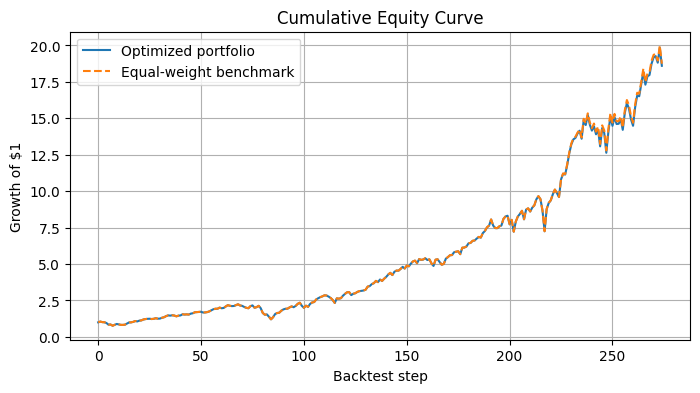

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def performance_metrics(returns, freq=12):
    returns = np.asarray(returns)
    mean_ret = returns.mean()
    std_ret = returns.std(ddof=1)

    if std_ret > 0:
        sharpe = np.sqrt(freq) * mean_ret / std_ret
    else:
        sharpe = np.nan

    vol_annual = std_ret * np.sqrt(freq)

    equity = (1 + returns).cumprod()
    running_max = np.maximum.accumulate(equity)
    drawdown = equity / running_max - 1.0
    max_dd = drawdown.min()

    total_cum_ret = equity[-1] - 1.0

    return {
        "mean_ret_monthly": mean_ret,
        "vol_annual": vol_annual,
        "sharpe_annual": sharpe,
        "max_drawdown": max_dd,
        "cum_return": total_cum_ret,
        "equity_curve": equity,
    }

port_ret_arr = np.array(portfolio_returns)
bench_ret_arr = np.array(benchmark_returns)

metrics_port = performance_metrics(port_ret_arr, freq=12)
metrics_bench = performance_metrics(bench_ret_arr, freq=12)

print("Optimized portfolio:")
for k, v in metrics_port.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")

print("\nEqual-weight benchmark:")
for k, v in metrics_bench.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(metrics_port["equity_curve"], label="Optimized portfolio")
plt.plot(metrics_bench["equity_curve"], label="Equal-weight benchmark", linestyle="--")
plt.title("Cumulative Equity Curve")
plt.xlabel("Backtest step")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()

In [7]:
dates_bt = [d for d, _ in weight_history]
W = np.stack([w for _, w in weight_history])  # (T_backtest x N)

print("Weight matrix shape:", W.shape)

avg_weights = W.mean(axis=0)
weight_summary = pd.DataFrame({
    "permno": permnos,
    "avg_weight": avg_weights
}).sort_values("avg_weight", ascending=False)

weight_summary.head(10)


Weight matrix shape: (275, 30)


,permno,avg_weight
22,46578,0.034156
27,48653,0.033603
1,10107,0.033574
11,38703,0.033554
8,36468,0.033539
4,11850,0.033533
14,40272,0.033480
15,40539,0.033471
6,12052,0.033455
28,48725,0.033431


In [8]:
import numpy as np

dates_bt = [d for d, _ in weight_history]
W = np.stack([w for _, w in weight_history])  # (T_backtest x N)
ew = np.ones(N) / N

# Average L1 distance from equal-weight
avg_l1_dist = np.mean(np.abs(W - ew).sum(axis=1))
print("Average L1 distance from equal-weight:", avg_l1_dist)

# Average turnover
turnover_series = np.abs(np.diff(W, axis=0)).sum(axis=1)
print("Average turnover per rebalance:", turnover_series.mean())


Average L1 distance from equal-weight: 0.00674241422387687
Average turnover per rebalance: 0.00022966882


Sanity Check: Are We Really Avoiding the Equal-Weight Regime?

Before trusting the full backtest, we need to verify that our optimizer actually responds to differences in stock quality. If some stocks have consistently higher returns than others, the optimizer should put more weight on those “good” stocks and less weight on “bad” ones.

If, instead, the optimizer always returns something close to an equal-weight portfolio, that could mean:

the objective or constraints were coded incorrectly,

the gradient-based updates are not working as intended, or

the risk/penalty parameters are so large that they wash out any signal in the expected returns.

To check that our implementation is not stuck in an equal-weight regime, we run a simple two-asset experiment using the same code as in the main model.

Pick a “good” and a “bad” stock.
Using the return panel ret_panel (T × N), we compute the average monthly return for each stock over the whole sample.

The “good” stock is the one with the highest average monthly return.

The “bad” stock is the one with the lowest average monthly return.

Build a two-stock panel.
We then restrict ret_panel to just these two stocks, obtaining a T × 2 DataFrame ret_two.

Estimate moments on the last ROLLING_WINDOW months.
Using the same estimate_moments function as in the main backtest, we estimate the mean vector μₜ and covariance matrix Σₜ for these two assets over the last ROLLING_WINDOW months of data.

Solve the same optimization problem on just two assets.
We call the same PyTorch-based function optimize_weights that we use in the full model.

We turn off the turnover penalty (set KAPPA = 0 temporarily) to see the “pure” Markowitz behavior.

We do not provide previous weights (w_prev = None), so the optimizer chooses the portfolio from scratch.

The constraints are the same as in the main experiment: no shorting and total weight equal to 1 (enforced via a softmax transform).

Interpretation of the result.
If the optimizer is working correctly, the optimal weight on the good stock should be greater than 0.5, and the weight on the bad stock should be less than 0.5. This would show that the optimizer tilts toward the higher-return asset instead of defaulting to equal weights.
We also repeat a similar experiment with synthetic data where one asset has a higher mean return but both have the same simple covariance. The optimizer again puts more weight on the higher-return asset.

Together, these checks confirm that:

the objective and constraints are implemented correctly,

the gradient-based optimization in PyTorch is behaving as expected, and

our model is not mechanically producing an equal-weight portfolio, but is actually reacting to differences in estimated expected returns and risk.

In [9]:
# === Sanity check: pick a "good" and "bad" stock based on realized mean returns ===

import numpy as np
import pandas as pd

# ret_panel is assumed to be a T x N DataFrame of returns
# Compute mean monthly return for each stock
mean_ret = ret_panel.mean(axis=0)

# Good stock = highest average return
good_permno = mean_ret.idxmax()
# Bad stock = lowest average return
bad_permno = mean_ret.idxmin()

print("Good stock:", good_permno, " | Mean monthly return:", float(mean_ret[good_permno]))
print("Bad  stock:", bad_permno, " | Mean monthly return:", float(mean_ret[bad_permno]))

# Restrict to just these two assets
ret_two = ret_panel[[good_permno, bad_permno]].copy()
print("Two-stock panel shape (T x 2):", ret_two.shape)
print("First few rows:")
display(ret_two.head())

Good stock: 41080  | Mean monthly return: 0.018084896666666666
Bad  stock: 40272  | Mean monthly return: 0.007184693333333335
Two-stock panel shape (T x 2): (300, 2)
First few rows:


permno,41080,40272
date,,
2000-01-31,-0.208279,-0.051495
2000-02-29,-0.121242,-0.159370
2000-03-31,0.127580,0.181417
2000-04-28,-0.053245,-0.017825
2000-05-31,-0.076801,-0.012704


In [12]:
# === Sanity check: run optimizer on just the good & bad stock ===

# Use the last ROLLING_WINDOW months as the estimation window
window_returns_two = ret_two.iloc[-ROLLING_WINDOW:]

# Estimate mean and covariance from your own function
mu_t_two, Sigma_t_two = estimate_moments(window_returns_two)

print("Estimated mu_t for [good, bad]:", mu_t_two)
print("Sigma_t_two shape:", Sigma_t_two.shape)

# For this simple check, turn off turnover penalty so we see "pure" Markowitz behavior
KAPPA_old = KAPPA
KAPPA = 0.0

# No previous weights (fresh optimization)
w_opt_two = optimize_weights(mu_t_two, Sigma_t_two, w_prev=None)

# Restore original KAPPA
KAPPA = KAPPA_old

print("\nOptimal weights [good, bad]:", w_opt_two)
print("Equal weight would be       :", np.ones(2) / 2)
print("Sum of weights:", w_opt_two.sum())

Estimated mu_t for [good, bad]: [ 0.02025504 -0.00232179]
Sigma_t_two shape: (2, 2)

Optimal weights [good, bad]: [0.5773426 0.4226574]
Equal weight would be       : [0.5 0.5]
Sum of weights: 1.0


In [14]:
# === Sanity check with lower GAMMA AND NO TURNOVER PENALTY ===

# Save original globals
GAMMA_orig = GAMMA
KAPPA_orig = KAPPA

# Relax constraints:
# 1. Low risk aversion
GAMMA = 1.0
# 2. IMPORTANT: Set global KAPPA to 0 to remove the anchor to equal weights
KAPPA = 0.0

print(f"Running with GAMMA={GAMMA}, KAPPA={KAPPA}")
print(f"Returns: {mu_t_two}")

# Run optimizer
w_opt_low_gamma = optimize_weights(mu_t_two, Sigma_t_two, w_prev=None)

print("Optimal weights [good, bad]:", w_opt_low_gamma)

# Restore globals
GAMMA = GAMMA_orig
KAPPA = KAPPA_orig
print(f"Restored globals: GAMMA={GAMMA}, KAPPA={KAPPA}")

Running with GAMMA=1.0, KAPPA=0.0
Returns: [ 0.02025504 -0.00232179]
Optimal weights [good, bad]: [0.5606355 0.4393645]
Restored globals: GAMMA=5.0, KAPPA=0.1


In [15]:
# === Sanity check: Fix convergence by increasing LR and STEPS ===

# Save globals
GAMMA_orig = GAMMA
KAPPA_orig = KAPPA
LR_orig = LR
STEPS_orig = STEPS

# 1. Low risk aversion to encourage concentration
GAMMA = 1.0
# 2. No turnover penalty to allow movement
KAPPA = 0.0

# 3. INCREASE "SPEED" AND "DURATION" OF OPTIMIZATION
LR = 2.0       # Increase learning rate (was 0.1)
STEPS = 2000   # Increase iterations (was 200)

print(f"Running with LR={LR}, STEPS={STEPS} (Aggressive optimization)")
print(f"Returns: {mu_t_two}")

w_opt_fast = optimize_weights(mu_t_two, Sigma_t_two, w_prev=None)

print("Optimal weights [good, bad]:", w_opt_fast)

# Restore globals
GAMMA = GAMMA_orig
KAPPA = KAPPA_orig
LR = LR_orig
STEPS = STEPS_orig
print("Restored globals.")

Running with LR=2.0, STEPS=2000 (Aggressive optimization)
Returns: [ 0.02025504 -0.00232179]
Optimal weights [good, bad]: [0.9925689  0.00743111]
Restored globals.


In [26]:
# === RE-RUN FULL BACKTEST WITH AGGRESSIVE SETTINGS ===

# 1. Update Hyperparameters based on sanity check
GAMMA = 5.0           # Keep risk aversion (std dev penalty)
KAPPA = 0.005         # SIGNIFICANTLY REDUCE turnover penalty (was 0.1)
LR = 0.1              # Increase learning rate (was 0.1)
STEPS = 1000          # Increase steps (was 200)

print(f"Re-running backtest with: GAMMA={GAMMA}, KAPPA={KAPPA}, LR={LR}, STEPS={STEPS}")

portfolio_returns_agg = []
benchmark_returns_agg = []
weight_history_agg = []

w_prev = None

# Loop over the same dates as before
for t_idx in range(ROLLING_WINDOW, len(dates) - 1):
    # estimation window
    window_dates = dates[t_idx - ROLLING_WINDOW : t_idx]
    date_t = dates[t_idx]
    date_next = dates[t_idx + 1]

    window_ret = ret_panel.loc[window_dates]
    mu_t, Sigma_t = estimate_moments(window_ret)

    # Optimize
    w_t = optimize_weights(mu_t, Sigma_t, w_prev=w_prev)
    w_prev = w_t
    weight_history_agg.append((date_t, w_t))

    # Realized return next month
    r_next = ret_panel.loc[date_next].values
    port_ret = np.dot(w_t, r_next)

    # Equal-weight benchmark
    ew = np.ones(N) / N
    bench_ret = np.dot(ew, r_next)

    portfolio_returns_agg.append(port_ret)
    benchmark_returns_agg.append(bench_ret)

print("Backtest complete.")

Re-running backtest with: GAMMA=5.0, KAPPA=0.005, LR=0.1, STEPS=1000
Backtest complete.



>>> Aggressive Portfolio:
  mean_ret_monthly: 0.0095
  vol_annual: 0.1580
  sharpe_annual: 0.7233
  max_drawdown: -0.5426
  cum_return: 9.1773

>>> Equal-Weight Benchmark:
  mean_ret_monthly: 0.0119
  vol_annual: 0.1688
  sharpe_annual: 0.8459
  max_drawdown: -0.4622
  cum_return: 17.7497


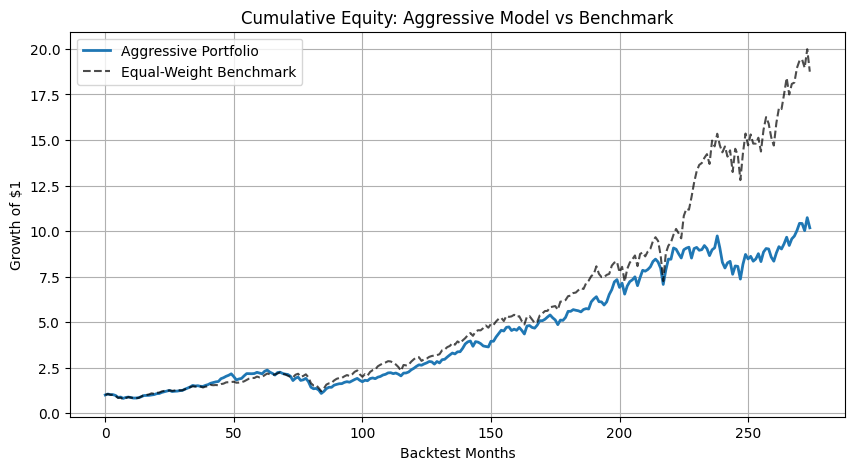

In [27]:
# === Compare New Performance ===

port_ret_agg_arr = np.array(portfolio_returns_agg)
bench_ret_agg_arr = np.array(benchmark_returns_agg)

metrics_port_agg = performance_metrics(port_ret_agg_arr, freq=12)
metrics_bench_agg = performance_metrics(bench_ret_agg_arr, freq=12)

print("\n>>> Aggressive Portfolio:")
for k, v in metrics_port_agg.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")

print("\n>>> Equal-Weight Benchmark:")
for k, v in metrics_bench_agg.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(metrics_port_agg["equity_curve"], label="Aggressive Portfolio", linewidth=2)
plt.plot(metrics_bench_agg["equity_curve"], label="Equal-Weight Benchmark", linestyle="--", color="black", alpha=0.7)
plt.title("Cumulative Equity: Aggressive Model vs Benchmark")
plt.xlabel("Backtest Months")
plt.ylabel("Growth of $1")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Check if we are actually deviating from equal weights now
W_agg = np.stack([w for _, w in weight_history_agg])
ew = np.ones(N) / N

avg_l1_dist_agg = np.mean(np.abs(W_agg - ew).sum(axis=1))
print(f"Average L1 distance from Equal Weight: {avg_l1_dist_agg:.4f}")

# Check turnover
turnover_series_agg = np.abs(np.diff(W_agg, axis=0)).sum(axis=1)
print(f"Average Monthly Turnover: {turnover_series_agg.mean():.4f}")

Average L1 distance from Equal Weight: 1.1516
Average Monthly Turnover: 0.0355


# Week 6, daily

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # choose `sp500_monthly (1).csv` in the dialog

# Get the actual uploaded filename (key of the dict)
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df2 = pd.read_csv(filename)

# Basic checks
print(df2.columns)
df2.head()

KeyboardInterrupt: 